# Solution Graded Exercise 12: Spatial Working Memory (Compte et. al.)

first name: Eve

last name: Rahbe

sciper: 235549

date: 23.05.18

*Your teammate*

first name of your teammate: Antoine

last name of your teammate: Alleon

sciper of your teammate: 223333


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.

** Remember **

If you are asked for plots: The appearance of the plots (labelled axes, ** useful scaling **, etc.) is important!

If you are asked for discussions: Answer in a precise way and try to be concise. 


** Submission **

Rename this notebook to Ex12_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/spatial-working-memory.html

## \* \* \* \* IMPORTANT: neurodynex update  \* \* \* \*

This exercise requires an update of the neurodynex package. For the update, please run the following lines in your terminal:

> source activate bmnn
>
> conda update -c brian-team -c epfl-lcn neurodynex

# Exercise 12.1. Spontaneous bump formation

### Exercise 12.1.1. Question: External poisson population
1) By default, how many neurons are in the external poisson population?

2) Using the default parameters, what is the average number of spikes/second an excitatory neuron receives from the external population? 
#### [1 + 1  points]

3) We use the Brian2 PoissonInput to implement the external population. Which post-synaptic variable is targeted by a presynaptic (poisson) spike?

#### [1  points]

4) The dynamics of that variable are defined in the equations excit_lif_dynamics (still in the source code of simulate_wm). What is the time-scale of that variable (in milliseconds)?

#### [1  points]

\textit{1) There are N = 1000 neurons in the external poisson population.}

\textit{2) In average, an excitatory neuron receives 1.4 spikes per second from the external population.}

\textit{3) The post-synaptic variable targeted by a presynaptic spike is $v$, the post-synaptic voltage.}

\textit{4) The time-scale of that variable is defined in the exponential of excit2excit term of $dv/dt$ and is equal to $1/0.062 = 16,13 ms$.}

### Exercise 12.1.2. Question: Unstructured input

(<matplotlib.figure.Figure at 0x1159417d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11394aa50>)

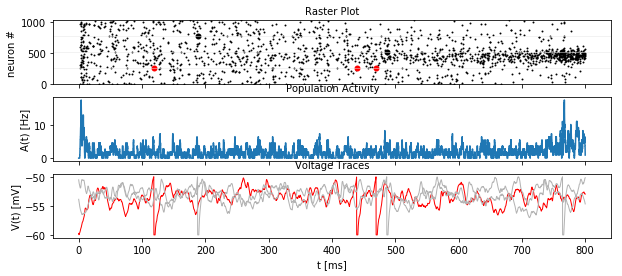

In [76]:
%matplotlib inline
import brian2 as b2
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate= 2.2 * b2.Hz, sigma_weight_profile=20., Jpos_excit2excit=1.6)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)

(<matplotlib.figure.Figure at 0x152c6aa550>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10b793910>)

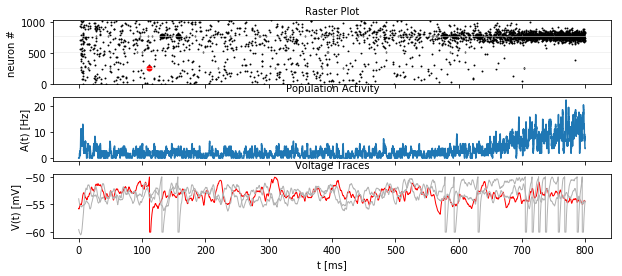

In [2]:
%matplotlib inline
import brian2 as b2
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate= 2.2 * b2.Hz, sigma_weight_profile=20., Jpos_excit2excit=1.6)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)

1) Without coding, from the plot: What is the population activity (mean firing rate) of the excitatory population at different points in time?

2) Change the firing rate of the external population to 2.2Hz. What do you observe?

#### [2  + 2  points]

3) Run the simulation a few times with r_ext = 2.2 Hz. Describe your observations.

#### [2   points]

\textit{1) The population activity of the excitatory population is ranged between 0 and 4 Hz, and mostly between 0 and 2 Hz, at different points in time.}

\textit{2) We obseve subpopulations of neurons from the excitatory population that show increased firing rate compared to other neurons, at different moment in time. As a consequence, mean activity increases and show higher maxima. In general more spikes are generated by neurons from the excitatory population.}

\textit{3) Mean activity of excitatory population is preserved but distribution of spikes in time and in neurons subpopulations is random.}

### Exercise 12.1.3. Question: Weight profile

Text(0,0.5,u'Weight')

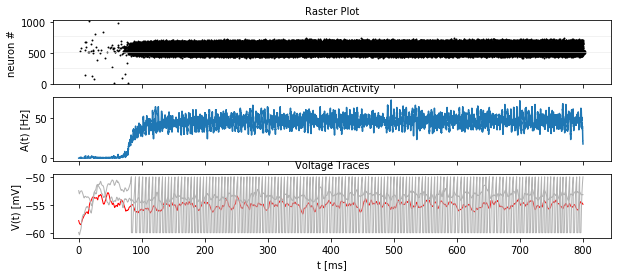

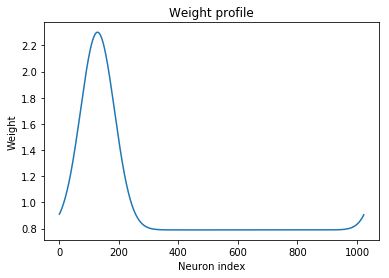

In [3]:
%matplotlib inline
import brian2 as b2
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools
import matplotlib.pyplot as plt

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, weight_profile_45 = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=1.3 * b2.Hz, sigma_weight_profile=20., Jpos_excit2excit=2.3)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)

plt.figure()
plt.plot(weight_profile_45)
plt.title("Weight profile")
plt.xlabel("Neuron index")
plt.ylabel("Weight")

When increasing \textit{Jpos_excit2excit}, the distribution of the weight profile does not change but the maximum value increases to \textit{Jpos_excit2excit}. Moreover, spikes are only generated by a specific neurons subpopulation and the excitatory population activity increases after a certain time.

When changing the parameter \textit{sigma_weight_profile}, the weight profile does change: by decreasing it, the distribution is more narrow and the maximum is increased; by increasing it, the distribution is wider and the maximum is decreased. Indeed \textit{sigma_weight_profile} is the standard deviation of the weight distribution.

#### [ 5  points]

# Exercise 12.2. Network response to a structured input stimulus

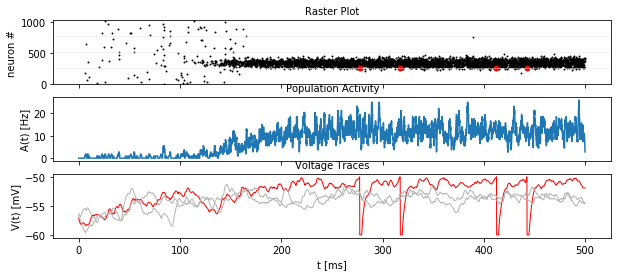

In [4]:
import brian2 as b2
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools
import matplotlib.pyplot as plt


rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.1 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

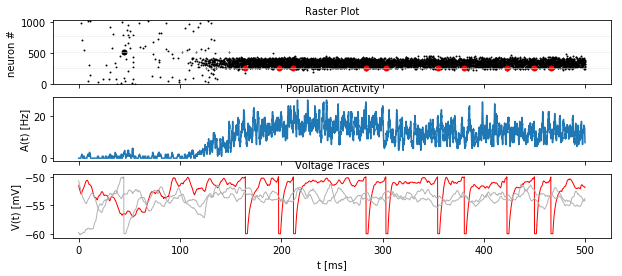

In [5]:
import brian2 as b2
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools
import matplotlib.pyplot as plt


rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=60, stimulus_strength=.1 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

### Exercise 12.2.1. Question: Integration of input

#### [5  points]

\textit{1) Just before 200ms we can observe a change in the population activity. This time corresponds to almost 100ms after the stimulus is applied.}

\textit{2) The population activity is around 15Hz at the end of the simulation (500ms).}

3) ![title](IMG_7823.jpg)

\textit{4) When increasing the stimulus strength to $0.5 namp$, the population activity decreases approximately by half when the stimulus stops.}

\textit{5) Using a stimulus strenght of $0.1 namp$:}
\textit{- with a stimulus width of $30$ deg the population activity will stay constant after the stimulus stops,}
\textit{- with a stimulus width of $60$ deg the population activity will decrease after the stimulus stops.}

### Exercise 12.2.2. Question: Role of the inhibitory population

#### [2+1+1+2  points]

Before running the simulation: What do you expect to see? (max 2 lines)

\textit{Without an inhibitory population, we expect that the population activity will be much higher than with it.} 

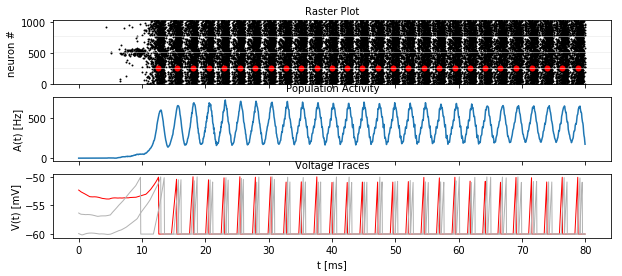

In [6]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(N_inhibitory = 1, stimulus_strength=0.65 * b2.namp, t_stimulus_start=5 * b2.ms, t_stimulus_duration=25 * b2.ms, sim_time=80. * b2.ms)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

\textit{Indeed we observe a higher population activity (between 250 and 500 Hz approximately) with a constant oscillation.}

Now run again a “normal” simulation:

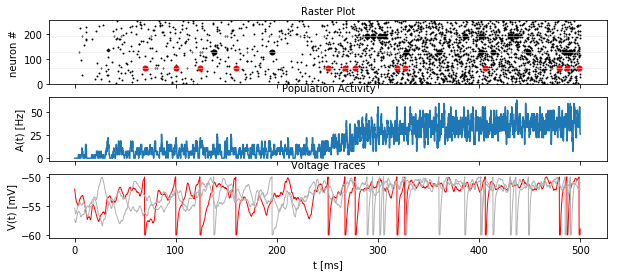

In [7]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, t_min=0. * b2.ms)
plt.show()

What is the role of the inhibitory population? (max 2 lines)

\textit{The role of the inhibitory population is to balance the population activity of the model. ?????}

# Exercise 12.3: Decoding the population activity into a population vector

### Exercise 12.3.1. Mapping the neuron index onto its preferred direction

#### [3 points]

In [8]:
def get_orientation(idx_list, N):
    return [(x+0.5)*360/N for x in idx_list]

In [9]:
get_orientation([0,1,5,10], 11)

[16.363636363636363, 49.09090909090909, 180.0, 343.6363636363636]

### Exercise 12.3.2. Extracting spikes from the spike monitor


#### [ 4  points]

In [12]:
# modify the following code
def get_spike_count(spike_monitor, spike_index_list, t_min, t_max):
    nr_neurons = len(spike_index_list)
    spike_count_list = np.zeros(nr_neurons)
    spike_trains = spike_monitor.spike_trains()
    for i,j in enumerate(spike_index_list): # i is index of list, j is value at index i
        # loop over the list of neurons and get the spikes within the time window:
        spike_count_list[i] = sum((spike_trains[j]>=t_min) & (spike_trains[j]<(t_max))) # sum of a list of boolean : (t>=a & t<b)
    return spike_count_list

Text(0,0.5,u'Spike rate [Hz]')

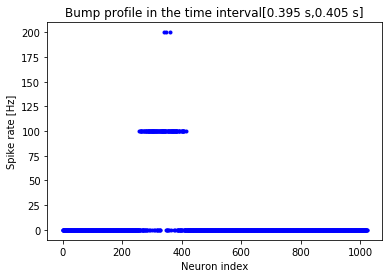

In [13]:
import matplotlib.pyplot as plt
import numpy as np

t = 400*b2.ms  # time point of interest
t_window = 10*b2.ms # width of the window over which the average is taken

t_min = t-t_window/2
t_max = t+t_window/2
spike_counts = get_spike_count(spike_monitor_excit, idx_monitored_neurons_excit, t_min, t_max)
spike_rates = spike_counts/(t_max-t_min)/b2.second
plt.plot(spike_rates, ".b")
plt.title("Bump profile in the time interval[{},{}]".format(t_min, t_max))
plt.xlabel("Neuron index")
plt.ylabel("Spike rate [Hz]")

### Exercise 12.3.3. Computing the population vector

#### [3  points]

In [16]:
def get_theta_time_series(spike_monitor, spike_index_list, t_snapshots, t_window, N_exc = 1024):
    theta_t = np.zeros(len(t_snapshots))
    for i in range(len(t_snapshots)):
        spike_counts = get_spike_count(spike_monitor, spike_index_list, t_snapshots[i]-t_window/2, t_snapshots[i]+t_window/2)
        weighted_spike_counts = spike_counts/np.sum(spike_counts)
        theta = np.asarray(get_orientation(spike_index_list, N_exc))
        idx = weighted_spike_counts==np.max(weighted_spike_counts,keepdims=True)
        theta_t[i] = np.mean(theta[idx])
    return theta_t

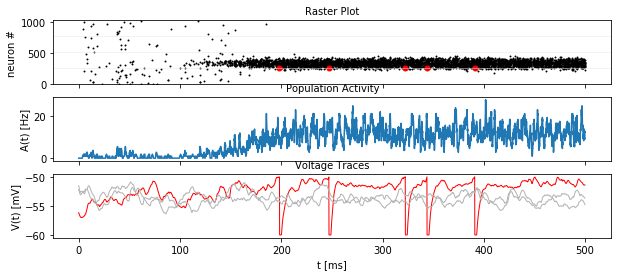

Text(0,0.5,u'Theta')

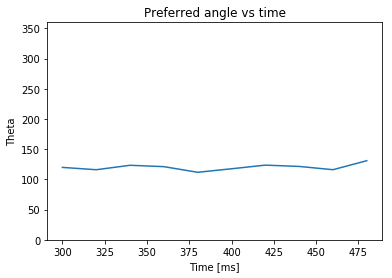

In [17]:
import math

t_start = 100 * b2.ms
t_dur = 200 * b2.ms
t_sim = 500 * b2.ms
t_window_width = 10 * b2.ms
snapshot_interval = 20 * b2.ms

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.1 * b2.namp, t_stimulus_start= t_start, t_stimulus_duration = t_dur, sim_time= t_sim)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

# Example how to create an array of timestamps spaced by snapshot_interval in the interval of interest.
t_snapshots = range(
    int(math.floor((t_start+t_dur)/b2.ms)),  # lower bound
    int(math.floor((t_sim-t_window_width/2)/b2.ms)),  # Subtract half window. Avoids an out-of-bound error later.
    int(round(snapshot_interval/b2.ms))  # spacing between time stamps
    )*b2.ms

# how your function get_theta_time_series could be called:
theta_ts = get_theta_time_series(spike_monitor_excit, idx_monitored_neurons_excit, t_snapshots, t_window_width)

# plot theta vs time using pyplot
import matplotlib.pyplot as plt
plt.ylim(0,360)
plt.plot(t_snapshots/b2.ms, theta_ts)
plt.title("Preferred angle vs time")
plt.xlabel("Time [ms]")
plt.ylabel("Theta")

### Exercise 12.3.4. Exercise: Visualize the diffusion of the population vector

#### [3 (coding) + 2 (discussion) points]

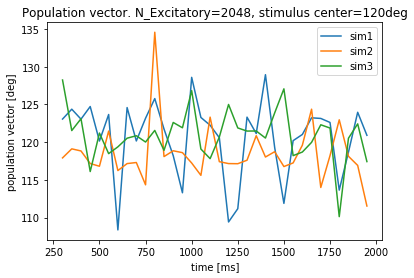

In [18]:
import math
import matplotlib.pyplot as plt

t_start = 100 * b2.ms
t_dur = 200 * b2.ms
t_sim = 2000 * b2.ms
t_window_width = 25 * b2.ms
snapshot_interval = 50 * b2.ms

# Example how to create an array of timestamps spaced by snapshot_interval in the interval of interest.
t_snapshots = range(
    int(math.floor((t_start+t_dur)/b2.ms)),  # lower bound
    int(math.floor((t_sim-t_window_width/2)/b2.ms)),  # Subtract half window. Avoids an out-of-bound error later.
    int(round(snapshot_interval/b2.ms))  # spacing between time stamps
    )*b2.ms

for i in range(3):
    rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(N_excitatory = 2048, N_inhibitory= 512, weight_scaling_factor=1.0, stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=2000. * b2.ms)

    # how your function get_theta_time_series could be called:
    theta_ts = get_theta_time_series(spike_monitor_excit, idx_monitored_neurons_excit, t_snapshots, t_window_width, N_exc = 2048)

    # plot theta vs time using pyplot
    plt.plot(t_snapshots/b2.ms, theta_ts)

plt.legend(['sim1', 'sim2', 'sim3'])
plt.xlabel('time [ms]')
plt.ylabel('population vector [deg]')
plt.title('Population vector. N_Excitatory=2048, stimulus center=120deg')
plt.show()

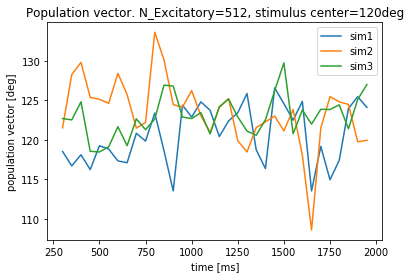

In [19]:
for i in range(3):
    rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(N_excitatory = 512, N_inhibitory= 128, weight_scaling_factor=4.0, stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06 * b2.namp, t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=2000. * b2.ms)

    # how your function get_theta_time_series could be called:
    theta_ts = get_theta_time_series(spike_monitor_excit, idx_monitored_neurons_excit, t_snapshots, t_window_width, N_exc = 512)

    # plot theta vs time using pyplot
    plt.plot(t_snapshots/b2.ms, theta_ts)
    
plt.legend(['sim1', 'sim2', 'sim3'])
plt.xlabel('time [ms]')
plt.ylabel('population vector [deg]')
plt.title('Population vector. N_Excitatory=512, stimulus center=120deg')
plt.show()

\textit{When looking over time, the population vector is not constant and fluctuates around the stimulus center (here 120 degree) for all 3 simulations. Fluctuations are due to diffusion and drift over time of the population vector.} 

# Exercise 12.4. Reading exercise: slow and fast channels

### Exercise 12.4.1.

#### [2 points]

\textit{The time-scale of the fast rise is $1.88 ms$ and the time-scale of the slow decay is $65 ms$ as define in the code as tau_NMDA_x and tau_NMDA_s constants respectively.}

# Exercise 12.5: Effect of disinhibition on the bump shape
### *** Note:*** this exercise is not available online, all necessary information is given here.

In this exercise we will try to reproduce the results of the paper "*Linking Microcircuit Dysfunction to Cognitive Impairment: Effects of Disinhibition Associated with Schizophrenia in a Cortical Working Memory Model*" (https://academic.oup.com/cercor/article/24/4/859/321897). 
As you can read in the abstract, "Excitation–Inhibition balance (E/I balance) is a fundamental property of cortical microcircuitry. Disruption of E/I balance in prefrontal cortex is hypothesized to underlie cognitive deficits observed in neuropsychiatric illnesses such as schizophrenia". 
In order to understand this exercise, you do not need to read the full paper, but you will need to get a general understanding of the research topic (we recommend to read the abstract) and a detailed understanding of figures  1, 2 and 5 (make sure you understand the meaning of the quantities involved in those plots).

In this paper, the authors pharmacologically alter the E/I balance in the prefrontal cortex through the use of a drug which reduces the conductance of the excitatory-to-inhibitory  synapses, $G_{EI}$. 
In this way, the inhibitory neurons are less activated and therefore the excitatory neurons are disinhibited. 
In other words, they pharmacologically induce the specific symptoms they want to understand.

More interestingly, from our perspective, they use an analogous model that you have been using so far in order to understand **why** disinhibition is associated with some of the symptons of schizophrenia, such as a reduced ability of keeping the focus on a fixation point. 

**Note:**  In what follows we will reproduce qualitatively some of the results shown in the paper's figures. However a perfect match between numerical values cannot be achieved as our neural network slightly differs from that of the paper.

### Exercise 12.5.1
#### [4 points]
As a starting point, we can see qualitatively the effect of disinhibition on the bump width by running the simulation with two different values of $G_{EI}$ (in the code, $G_{EI}$ is "G_excit2inhib"). The plot should be qualitatively similar to Fig. 2.A of the paper.

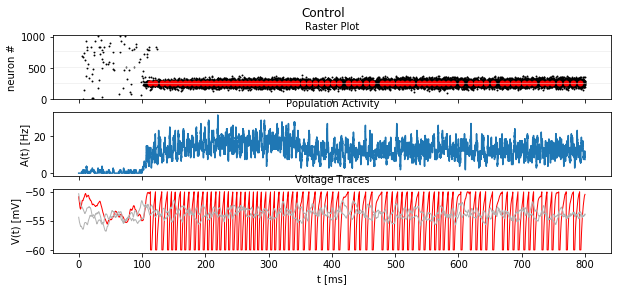

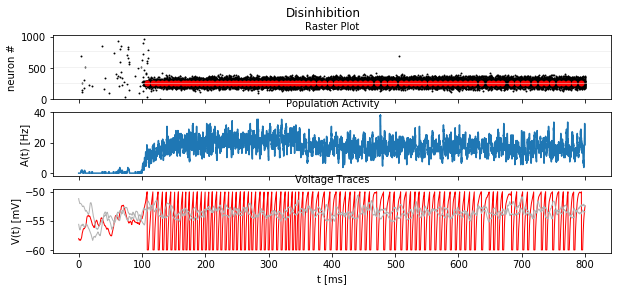

In [112]:
%matplotlib inline
import brian2 as b2
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools
import numpy as np
import matplotlib.pyplot as plt
from math import ceil, floor

# repeat the following passeages for the desired values of G_E
G_EI = 122.64
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg = 90, stimulus_width_deg=30, stimulus_strength=.3 * b2.namp, t_stimulus_start = .1 * b2.second, t_stimulus_duration = .250 * b2.second, G_excit2inhib = G_EI  * b2.psiemens)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.suptitle("Control")
plt.show()

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg = 90, stimulus_width_deg=30, stimulus_strength=.3 * b2.namp, t_stimulus_start = .1 * b2.second, t_stimulus_duration = .250 * b2.second, G_excit2inhib = 0.9675 * G_EI  * b2.psiemens)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.suptitle("Disinhibition")
plt.show()


### Exercise 12.5.2
#### [5 points]

In exercise 12.3.2 you plotted the profile of the bump. Starting from the the bump profile, write the function bump_width() that measures the bump's width. In order to measure the width of the bump, we take the full width at half maximum.  

In [98]:
# this function is useful to compute the bump width
def find_nearest_argmin(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx 

def bump_width(spike_counts, t_min, t_max):  
    spike_rates = spike_counts/(t_max-t_min)   # use the function get_spike_count
    half_max_rate = np.max(spike_rates)/2
    peak_position = np.argmax(spike_rates)
    left_bump_boundary =  find_nearest_argmin(spike_rates, half_max_rate) # use the find_nearest_argmin to determine the left bump boundary
    right_bump_boundary = peak_position + find_nearest_argmin(spike_rates[peak_position:], half_max_rate) # use the find_nearest_argmin to determine the right bump boundary
    bump_size = right_bump_boundary - left_bump_boundary
    return bump_size

### Exercise 12.5.3
#### [ 6 (for the simulation) + 6 (for the plots) points]
In this exercise we reproduce figures 2.C and 2.D of the paper. 

You will need to use the fucntion bump_width() to plot the bump's width vs the decrease of $G_{EI}$ in percentage, in order to reproduce Fig. 2.B of the paper.

On the other hand you will need to use the function get_theta_time_series, in order to extract the poplation vector (which in the paper is called $\theta_{report}$ or just "report"). 
It is important to chose a proper time bin (such that you filter out the oscillations, but you can still capture the drift of the population vector).

**Parameters for the stimulus:** N_excitatory=1024, N_inhibitory=256, stimulus_center_deg=180, stimulus_width_deg=40, stimulus_strength=0.3 namp, t_stimulus_start=10 ms, t_stimulus_duration=100 ms, distractor_center_deg=120, distractor_width_deg=0, distractor_strength=0. namp, t_distractor_start=0 ms, t_distractor_duration=0 ms, G_excit2inhib = (1. - ?) .35 x 1.2 x 0.292  nS, sim_time=500. ms

**Making the plots**

In the same for-loop (on differnt values of $G_{EI}$) you can store the bump's width, population vector for the excitatory group and that of the inhibitory group. This will allow  you to save computational time! 
Then make two plots corresponding to Fig. 2.C and 2.D. 

In [109]:
resolution=10   # how many data points we want in the graph
n_trials=5 # number of trials on which we average every point in the graph
disinhibition_level=np.linspace(0.,0.14, resolution)   # define the range of values of the disinhibition

t = 400.0*b2.ms  # time point of interest
t_window = 100.0*b2.ms # width of the window over which the average is taken
t_minimum = t-t_window/2
t_maximum = t+t_window/2

# here we initialize the arrays in which we are going to store the quantity we need to plot
bump_w=np.array([0.0]*resolution)
bump_std=np.array([0.0]*resolution)

firing_rate_E=np.array([0.0]*resolution)
firing_rate_E_std=np.array([0.0]*resolution)

firing_rate_I=np.array([0.0]*resolution)
firing_rate_I_std=np.array([0.0]*resolution)

for i in range(resolution):
    bump_width_local=[0.0]*n_trials
    for j in range(n_trials):
        rate_monitor_excit, spike_monitor_excit, _ , idx_excit, rate_monitor_inhib , _ , _ , _ , _ = wm_model.simulate_wm(stimulus_strength=0.3*b2.namp, t_stimulus_start=10.*b2.ms, t_stimulus_duration=100.*b2.ms, distractor_center_deg=120, distractor_width_deg=0, G_excit2inhib = (1. - disinhibition_level[i]) * 0.35 * 1.2 * 0.292 *b2.nsiemens, sim_time=500. *b2.ms)
        spike_counts = get_spike_count(spike_monitor_excit, idx_excit, t_minimum, t_maximum)
        angle_degree = 1024/360.  # neural index to angle scaling factor 
        bump_width_local[j]= bump_width(spike_counts, t_minimum, t_maximum)/angle_degree
        
    bump_w[i]= np.mean(bump_width_local) # compute the mean of the bump_width_local
    bump_std[i]= np.std(bump_width_local) # compute the std of the bump_width_local
    
    # here we extract the rates from the monitors
    rate_excit = rate_monitor_excit.smooth_rate(window="flat", width=0.5*b2.ms)/b2.Hz
    rate_inhib = rate_monitor_inhib.smooth_rate(window="flat", width=0.5*b2.ms)/b2.Hz
    
    firing_rate_E[i] = np.mean(np.asarray(rate_excit[int(len(rate_excit)*0.8):])) # compute the mean of rate_excit over the last 20% of entries 
    firing_rate_E_std[i] = np.std(np.asarray(rate_excit[int(len(rate_excit)*0.8):])) # compute the std of rate_excit over the last 20% of entries 
    
    firing_rate_I[i] = np.mean(np.asarray(rate_inhib[int(len(rate_inhib)*0.8):])) # compute the mean of rate_inhib over the last 20% of entries
    firing_rate_I_std[i] = np.std(np.asarray(rate_inhib[int(len(rate_inhib)*0.8):])) # compute the std of rate_inhib over the last 20% of entries  

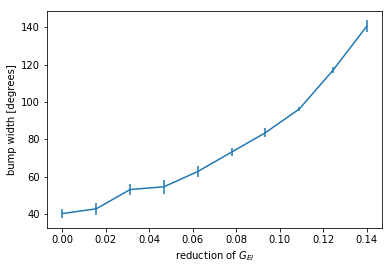

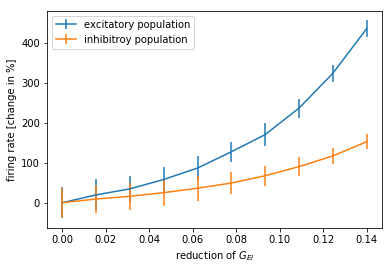

In [114]:
# reproducing Fig 2.C of the paper: 
# plot the bump_width vs disinhibition_level +- its std
 
plt.errorbar(disinhibition_level, bump_w, bump_std)
    
plt.xlabel('reduction of $G_{EI}$')
plt.ylabel('bump width [degrees]')
plt.show()

# reproducing Fig 2.D of the paper
# plot the change in firing rates vs disinhibition_level +- its std. 
# Let's start with the excitatory population.

# first you need to express the firing rates changes in percentage
firing_rate_E_perc = (firing_rate_E - firing_rate_E[0])/firing_rate_E[0]

# and the std
firing_rate_E_std_perc = firing_rate_E_std/firing_rate_E

# plot the firing rate change of the exc pop +- its std dev

plt.errorbar(disinhibition_level, firing_rate_E_perc*100, firing_rate_E_std_perc*100)

# repeat the same passages for the inhibitory population

firing_rate_I_perc = (firing_rate_I - firing_rate_I[0])/firing_rate_I[0]
firing_rate_I_std_perc = firing_rate_I_std/firing_rate_I

plt.errorbar(disinhibition_level, firing_rate_I_perc*100, firing_rate_I_std_perc*100)

plt.xlabel('reduction of $G_{EI}$')
plt.ylabel('firing rate [change in %]')
plt.legend(['excitatory population', 'inhibitroy population'])
plt.show()

# Exercise 12.6
In this exercise we study the combined effect of a distractor and disinhibition. Therefore we will focus on Fig. 5 of the paper.

### Exercise 12.6.1
#### [4 points]
Reproduce Fig. 5.A: use the proper keywords in the function simulate_wm in order to introduce a distractor in the system. Choose a value of the keyword "distractor_center_deg" and two values of $G_{EI}$ such that you qualitatively reproduce Fig. 5.A.

**Hint:** For the control case we use the default value of $G_{EI}$ and in the disinhibition case we lower that value by 10%. Simulate for 500ms (keyword sim_time).

**Stimulus parameters:** N_excitatory=1024, N_inhibitory=256, stimulus_center_deg=90, stimulus_width_deg=40, stimulus_strength=0.3 namp, t_stimulus_start=10 ms, t_stimulus_duration=100 ms

**Distractor parameters:** The distractor should have the same strenght, width and duration as the stimulus and should kick in 200ms after the stimulus starts. The position of the distract should be 90˚ higher than the stimulus, just as in the paper figure.

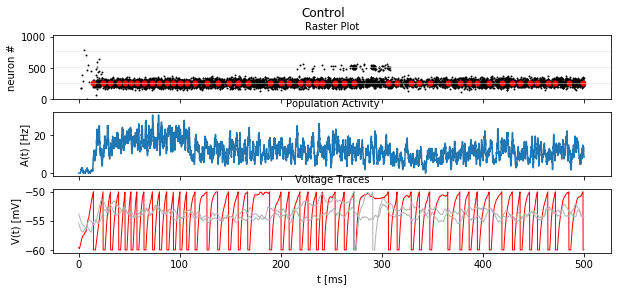

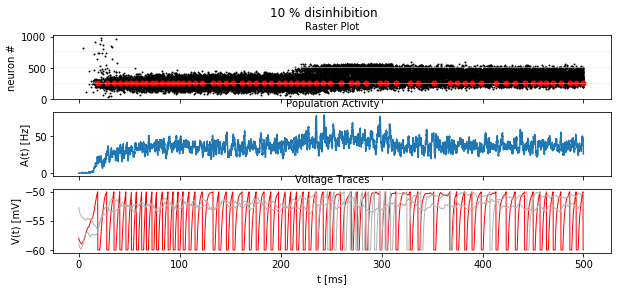

In [111]:
# Reproduction of plot 5A in paper
# raster plot bump with distractor for control case
G_EI = 122.64
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg = 90, stimulus_width_deg=40, stimulus_strength=.3 * b2.namp, t_stimulus_start = .01 * b2.second, t_stimulus_duration = .1 * b2.second, distractor_center_deg = 180, distractor_strength= .3*b2.namp, t_distractor_start= 210*b2.msecond, t_distractor_duration = .1 * b2.second, G_excit2inhib = G_EI * b2.psiemens, sim_time=0.5*b2.second)

fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)

plt.suptitle("Control")
plt.show()


# raster plot bump with distractor with disinhibition
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg = 90, stimulus_width_deg=40, stimulus_strength=.3 * b2.namp, t_stimulus_start = .01 * b2.second, t_stimulus_duration = .1 * b2.second, distractor_center_deg = 180, distractor_strength= .3*b2.namp, t_distractor_start= 210*b2.msecond, t_distractor_duration = .1 * b2.second, G_excit2inhib = 0.9 * G_EI * b2.psiemens, sim_time=0.5*b2.second)

fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)

plt.suptitle("10 % disinhibition")
plt.show()

### Exercise 12.6.2
#### [8 (for the coding) + 6 (for plots) + 3 (for the discussion) points]
1) Use the function "get_theta_time_series" as you did in exercise 5.3 in order to compute $\theta_{report}$ for different positions of the distractor and for 3 values of $G_{EI}$ such that $G_{EI}$ is reduced by 0, 7 and 14 % respectively. 

2) Reproduce Fig. 5.B: Plot $\theta_{report}$ as a function of the distractor position for a variation of $G_{EI}$ of 0, 7 and 14% (3 curves).

3) Comment the graph you made in point 2: how can we interpret the curves? How can we explain their shapes? Why is the maximum of each curve shifted to the right in the case of disinhibition? (Max 10 lines)

In [ ]:
b2.defaultclock.dt = 0.05 * b2.ms
t_sim= 500 * b2.ms

t_stimulus_start = 10 * b2.ms
t_stimulus_duration = 100 *b2.ms
stimulus_center_deg = 90
stimulus_width_deg = 40
stimulus_strength = 0.3 * b2.namp

t_distractor_start = 210 * b2.ms
t_distractor_duration = 100 *b2.ms
distractor_width_deg = 40
distractor_strength = 0.3 * b2.namp

# distractor angles
rel_distr_angles = np.array([0, 25, 50, 75, 100, 125, 150, 175])
distr_angles = rel_distr_angles + stimulus_center_deg

# synapse relevant for disinhibtion, this will also be looped over in the following
disinhib_percentages = np.array([0, 0.07, 0.14]) # enter here the correct disinhibition percentages   
G_excit2inhib_control =  .35 * 1.2 * 0.292 * b2.nS

N_excit = 512
N_inhib = 128
weight_scaling = 4

t_window_length = 100 * b2.ms
snapshot_interval = 20 * b2.ms
n_trials = 4 # increase or decrease the number of trials on the base of the tradeoff between the simulation time and the quality of the outcome

t_snapshots = range(int(floor((t_stimulus_start+t_stimulus_duration-t_window_length)/b2.ms)), int(ceil((t_sim-t_window_length)/b2.ms)), int(round(snapshot_interval/b2.ms)))*b2.ms
report = [[[[] for i in range(n_trials)] for j in range(len(distr_angles))] for k in range(len(disinhib_percentages))]
distractibility_windows = [[] for i in range(len(disinhib_percentages))]

for k in range(len(disinhib_percentages)):
    G_excit2inhib =  G_excit2inhib_control * (1-disinhib_percentages[k]) # set the correct value of G_EI (given G_excit2inhib_control and the disinhib_percentages)
    
    for i in range(len(distr_angles)):
        distractor_center_deg = distr_angles[i] # set the correct value of the distractor angular position
        
        for j in range(n_trials):
            rate_monitor_excit, spike_monitor_excit, _ , idx_excit, rate_monitor_inhib , _ , _ , _ , _= wm_model.simulate_wm(N_excitatory = N_excit, N_inhibitory = N_inhib, weight_scaling_factor = weight_scaling,
                    stimulus_center_deg=stimulus_center_deg, stimulus_width_deg=stimulus_width_deg, stimulus_strength=stimulus_strength,
                    t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration,
                    distractor_center_deg=distractor_center_deg, distractor_width_deg=distractor_width_deg, distractor_strength=distractor_strength,
                    t_distractor_start=t_distractor_start, t_distractor_duration=t_distractor_duration,
                    G_excit2inhib = G_excit2inhib,
                    sim_time=t_sim)
            
            theta_list = get_theta_time_series(spike_monitor_excit, idx_excit, t_snapshots, t_window_length, N_excit) # extract the population vector as before
            report[k][i][j] = np.mean(theta_list[int(len(theta_list)*0.9):]) # compute the mean of theta_list over the last 10% of entries 

# average over repetitions/initializations
report_averaged = np.mean(report, axis=2) - stimulus_center_deg # compute the mean of the report. Hint: use the keyword axis = 2
report_std = np.std(report, axis=2) # compute the std of the report. Hint: use the keyword axis = 2                                

In [ ]:
# reproduction of plot 5B in paper
plt.figure()
plt.xlabel(r"Distraction position [$\circ$]")
plt.ylabel(r"Report [$\circ$]")

# in the same graph, plot the report vs. distractor angle curves for the control case and the two disinhibition cases.
# Use the keyword label = ... for the legend

# control curves
# plot the averaged report value vs. the relative distractor angles
# add +- its std. (e.g. as thin, semi-transparent lines above and below)

plt.errorbar(rel_distr_angles, report_averaged[0], report_std[0], label= 'Control')

# ... same for disinhibition 1

plt.errorbar(rel_distr_angles, report_averaged[1], report_std[1], label= '7% dishinibition')

# ... same for disinhibition 2

plt.errorbar(rel_distr_angles, report_averaged[2], report_std[2], label= '14% dishinibition')

plt.legend()
plt.show()

4) Reproduce Fig. 5.C: extract the argmax of each of the $\theta_{report}$ curves that you computed in point 1 and plot these 4 values as a function of the corresponding variation of $G_{EI}$.

In [ ]:
# plot Fig. 5.C

# extract distractibility window (argmax of report curve, see fig. 5 in the paper)
for i in range(len(disinhib_percentages)):
    distractibility_windows[i] = rel_distr_angles[np.argmax(report_averaged[i])] 
    
# make the corresponding plot: distract. window against disinhibition percentage
plt.figure()
plt.plot(disinhib_percentages*100, distractibility_windows, "-o")
plt.xlabel("Percentage of disinhibition")
plt.ylabel(r"Distractibility window [$\circ$]")
plt.show()

5) Compare the plot you made in point 4 with the first one of exercise 5.3 (the graph correspondind to Fig. 2.B in the paper) and explain the similarity. (Max 5 lines)

We observe an exponential increase in bump width with respect to the reduction of $G_{EI}$ (question 5.3). We observe the same increase in the distractibility window with respect to the reduction of $G_{EI}$. Indeed as the bump width increases the distraction position required to reach the bump boundary increases and so does the distractibility window. This is because the report is non-zero only around the bump boundary.